In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [6]:
data = pd.read_csv(r'E:\T-Machine\python\Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [7]:
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [9]:
le=LabelEncoder()
data['Extracurricular Activities']=le.fit_transform(data['Extracurricular Activities'].astype(str))

In [10]:
data.head(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
5,3,78,0,9,6,61.0
6,7,73,1,5,6,63.0
7,8,45,1,4,6,42.0
8,5,77,0,8,2,61.0
9,4,89,0,4,0,69.0


In [11]:
X=data.iloc[:,:-1]
y=data.iloc[:,5]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [12]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
9254,5,49,0,7,5
1561,2,48,1,7,6
1670,2,81,0,7,2
6087,2,46,0,6,1
6669,8,47,0,9,0
...,...,...,...,...,...
5734,8,50,1,6,6
5191,4,68,0,9,3
5390,9,48,0,7,6
860,1,47,0,9,0


In [13]:
X_test

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
6252,5,69,0,8,2
4684,2,46,1,4,8
1731,7,56,1,7,5
4742,6,42,1,8,5
4521,7,53,0,4,6
...,...,...,...,...,...
6412,2,70,0,7,3
8285,4,79,0,9,3
7853,2,40,1,7,2
1095,3,83,0,7,5


In [14]:
y_train.shape

(8000,)

In [15]:
y_test.shape

(2000,)

In [16]:
re=LinearRegression()
re.fit(X_train,y_train)
y_predict=re.predict(X_test)

In [17]:
print(y_predict)

[54.71185392 22.61551294 47.90314471 ... 16.79341955 63.34327368
 45.94262301]


In [18]:
r2_score(y_predict,y_test)

0.9887203279837657

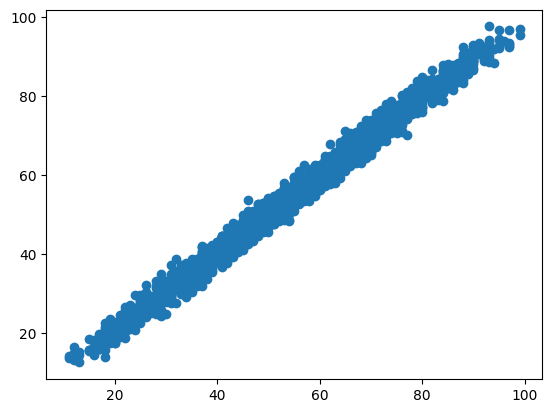

In [32]:

plt.scatter(y_test,y_predict)

plt.show()

In [20]:
line = np.polyfit(y_test, y_predict, 1) #fits a 1st degree polynomial (a line) to the y_test and y_predict data

In [21]:
x = np.linspace(min(y_test), max(y_test), 100) #creates a sequence of x values spanning the range of the test data

#The 100 in np.linspace(min(y_test), max(y_test), 100) specifies the number of samples to generate.

In [22]:
y = line[0]*x + line[1]  #calculates the corresponding y values for the line

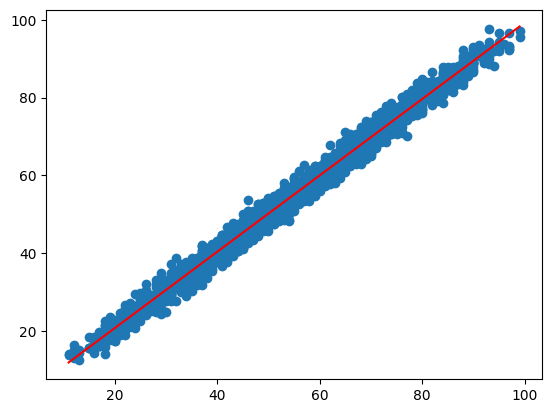

In [23]:
plt.scatter(y_test, y_predict)
plt.plot(x, y, color='red')  # Plot the best fit line
plt.show()